# Final CA - Estimating Price of CellPhones
In this project, we are about to estimate the prices of different cellphones. To do so, there are some libraries that are being used. These libraries have been explained below:
<br>


In [182]:
import re
from hazm import *
import numpy as np
import pandas as pd 
import seaborn as sb
import scipy.stats as stats
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [158]:
!pip3 install hazm

In [159]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive
%cd AI_final/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive/AI_final
[Errno 2] No such file or directory: 'AI_final/'
/content/drive/My Drive/AI_final
Final_AI_Project.ipynb  mobile_phone_dataset.csv


## Inputs of this problem
The input of this project, is a `csv` file which gives some data about the advertises that have been published in divar application. This data contains the brand of the cellphone, the city which this advertisement has taken place, the title the seller have been written, its description, number of images that have been uploaded from his or her cellphone, the date this advertisement has took place, and the price they have been estimated. 
<br>
The noticable part is that some of these goods have a price of -1. These rows are about to be predicted as their sellers have not been choosing a price for them.
<br>
This input data is being read by a function named `read_csv` from `pandas` library. The result has been displayed below.

In [160]:
dataset = pd.read_csv('mobile_phone_dataset.csv') 
display(dataset)

,Unnamed: 0,brand,city,title,desc,image_count,created_at,price
0,0,Nokia::نوکیا,Qom,نوکیا6303,سلام.یه گوشیه6303سالم که فقط دوتا خط کوچیک رو ...,2,Wednesday 07AM,60000
1,1,Apple::اپل,Tehran,ایفون ٥اس٣٢گیگ,درحد نو سالم اصلى بدون ضربه مهلت تست میدم,0,Wednesday 11AM,1150000
2,2,Samsung::سامسونگ,Mashhad,سامسونگ j5,گوشى بسیار بسیار تمیز و فقط سه هفته کارکرده و ...,2,Wednesday 02PM,590000
3,3,Apple::اپل,Karaj,گرى 5s ایفون 32گیگ,گلس پشت و رو .کارت اپل ای دی. لوازم جانبی اصلی...,3,Wednesday 04PM,1100000
4,4,Samsung::سامسونگ,Tehran,galaxy S5 Gold در حد آک,کاملا تمیز و بدون حتی 1 خط و خش\nبه همراه گلاس...,2,Friday 01PM,900000
...,...,...,...,...,...,...,...,...
59184,62171,Apple::اپل,Tehran,گوشی موبایل ایفون(4S (32GB,گوشی موبایل ایفون 4S\n32 گیگ سفید سالم دکمه هو...,3,Tuesday 03PM,500000
59185,62172,LG::ال‌جی,Mashhad,گوشی ال جی k10تمیزومرتب بدون خط وخش,گوشی ال جی سالم وبدون کوچکترین ایرادوبدون خط و...,3,Tuesday 05PM,520000
59186,62173,Apple::اپل,Tehran,/١٦gig/5s/گلد,جعبه ولوازم LLAاصل/بدون خط وخش/باز نشده/سالم.,2,Wednesday 11AM,720000
59187,62174,Samsung::سامسونگ,Tehran,گلکسی galaxy s4 i9500,سالم و تمیز با لوازم\nاندروید 5. باتری اورجینا...,2,Thursday 09AM,475000


As it was mentioned before, a part of this data contains some goods which have been priced with -1. By using the `groupby` and `get_group` functions from `pd` library. Moreover, the test data that is labeled with -1 are being separated in here. This part of data has been shown below.

In [161]:
grouped_data = dataset.groupby(['price'])
minus_price_data = grouped_data.get_group(-1)
display(selected)

,Unnamed: 0,brand,city,title,desc,image_count,created_at,price
23,23,Samsung::سامسونگ,Karaj,A3 2015,گوشی در حده نو کلا 2 هفتس خریدمش.با تشکر از سا...,1,Tuesday 12PM,-1
28,28,Apple::اپل,Qom,اپل 5s ٣٢ گیگ بسیار تمیز در حد,گوشی بسیار تمیز در حد قیمت مقطوع میباشد لطفا ت...,2,Saturday 04AM,-1
32,32,Apple::اپل,Shiraz,اقساط٢٤ماهه بدون پیش پرداخت,اقساط ٢٤ماهه بدون پیش پرداخت,0,Sunday 03PM,-1
36,37,Sony::سونی,Qom,سونی مدل acro s گوشی هواوی y300,"گوشی سونی مدل acro s دوربین 12 فیلمبرداری HD ,...",2,Thursday 06AM,-1
44,46,HTC::اچ‌تی‌سی,Tehran,ّگوشی موبایل htc desire610 جهت معاوضه,معاوضه با ایفون 4\nگوشیم سالم سالم 4g\nبدون هی...,0,Monday 08PM,-1
...,...,...,...,...,...,...,...,...
59121,62104,Lenovo::لنوو,Karaj,گوشی موبایل HuaweiG610,دست دوم خیلی نو فقط هارد گوشی سوخته باید تعمیر...,3,Tuesday 11AM,-1
59146,62131,Samsung::سامسونگ,Karaj,گوشی سامسونگ گلکسی مینی اندروید,گوشی سامسونگ گلکسی مینی اندروید\nتمیز \nدر حد نو,3,Wednesday 01PM,-1
59169,62155,Apple::اپل,Shiraz,iPhone SE 16GB / RoseGold,آیفون فوق بسیار تمیز و در حد نو می‌باشد(بدون ه...,4,Sunday 12PM,-1
59174,62160,Samsung::سامسونگ,Mashhad,نوت 5گلدتک سیم درحدمعاوضه فقط با 5sیا6s,در حد اک ۳۲گیگ معاوضه فقط با اپل ۵اس یا ۶اس ۶۴...,0,Tuesday 10AM,-1


After observing the situation, the rest of the data will be separated as the train data.

In [162]:
dataset = dataset[dataset['price'] !=-1]
display(dataset)

,Unnamed: 0,brand,city,title,desc,image_count,created_at,price
0,0,Nokia::نوکیا,Qom,نوکیا6303,سلام.یه گوشیه6303سالم که فقط دوتا خط کوچیک رو ...,2,Wednesday 07AM,60000
1,1,Apple::اپل,Tehran,ایفون ٥اس٣٢گیگ,درحد نو سالم اصلى بدون ضربه مهلت تست میدم,0,Wednesday 11AM,1150000
2,2,Samsung::سامسونگ,Mashhad,سامسونگ j5,گوشى بسیار بسیار تمیز و فقط سه هفته کارکرده و ...,2,Wednesday 02PM,590000
3,3,Apple::اپل,Karaj,گرى 5s ایفون 32گیگ,گلس پشت و رو .کارت اپل ای دی. لوازم جانبی اصلی...,3,Wednesday 04PM,1100000
4,4,Samsung::سامسونگ,Tehran,galaxy S5 Gold در حد آک,کاملا تمیز و بدون حتی 1 خط و خش\nبه همراه گلاس...,2,Friday 01PM,900000
...,...,...,...,...,...,...,...,...
59184,62171,Apple::اپل,Tehran,گوشی موبایل ایفون(4S (32GB,گوشی موبایل ایفون 4S\n32 گیگ سفید سالم دکمه هو...,3,Tuesday 03PM,500000
59185,62172,LG::ال‌جی,Mashhad,گوشی ال جی k10تمیزومرتب بدون خط وخش,گوشی ال جی سالم وبدون کوچکترین ایرادوبدون خط و...,3,Tuesday 05PM,520000
59186,62173,Apple::اپل,Tehran,/١٦gig/5s/گلد,جعبه ولوازم LLAاصل/بدون خط وخش/باز نشده/سالم.,2,Wednesday 11AM,720000
59187,62174,Samsung::سامسونگ,Tehran,گلکسی galaxy s4 i9500,سالم و تمیز با لوازم\nاندروید 5. باتری اورجینا...,2,Thursday 09AM,475000


## Deleting invaluable data
Some of the prices have been recorded wrong. These prices have been recorded omitting some zeros as a problem or the difference between rial and toman. There are ways to delete these outlier data. <br>
> **1. zscore**
<br>
Simply put, a z-score (also called a standard score) gives you an idea of how far from the mean a data point is. Z-scores are a way to compare results to a “normal” population. As the outlier data shouln't be considered as a valuable data. To eliminate these data, by calculating this measure for each price, the outlier will be given an abnormal score which is not acceptable. Hence, by having a threshhold on the value of zscore, we can find outlier data. The zscore will be calculated with this equation:
$$Z \ score = \frac{x-\mu}{\sigma} $$
Which $\mu$ indicates the mean of data and $\sigma$ indicated standard deviation.
<br>
To implement this on our project, we have used `zscore()` function from `scipy.stats` library, with the threshholds of -1.5 and 3. 
<br>
<br>
**2. deleting some outlier data**
This approaches describes a method which eliminates the first and last 5% of data. In this task, the deleting was not accurate enough and as a result, could not clear the wrong data successfully.
<br><br>
**3. choosing threshholds**
<br>
By choosing threshholds, the unnecessary data will be deleted. if it has a price lower or upper than the threshholds. This approach will gove a reasonable answer as well, but the zscore method is working much better in this case.
> <br><br>
> 

It should be noted that in this problem, some columns are not carrying much of an important information. In order to keep less data, these columns have been deleted from dataset.


In the figure plotted below using `seaborn` library, the variation of prices have been shown. It can easily be seen that a lot of data around 0 exist. And also there are some values that are definitely way more than the normal values. These are outlier data that should be eliminated.

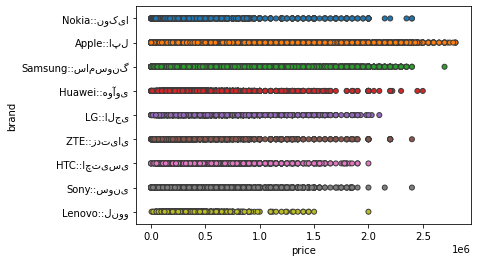

In [163]:
compare = pd.DataFrame(dataset, columns = ['brand', 'price'])
answer = sb.stripplot(data=compare, y='brand', x='price', jitter=0, linewidth=1)

In [164]:
new_df = []
grouped_data = dataset.groupby(['brand'])

for index, value in enumerate(dataset['brand'].unique()):
    selected_group = grouped_data.get_group(value)
    selected_group.insert(2, 'zscore', stats.zscore(selected_group['price']).tolist() )
    new_df.append(selected_group)

updated_dataset = pd.concat([new_df[i] for i in range(len(dataset['brand'].unique()))])
display(updated_dataset)
updated_dataset = updated_dataset[updated_dataset['zscore'] > -1.5]
updated_dataset = updated_dataset[updated_dataset['zscore'] < 3.0]

updated_dataset = updated_dataset.drop(['zscore'], axis=1)
updated_dataset = updated_dataset.drop(['desc'], axis=1)
updated_dataset = updated_dataset.drop(['image_count'], axis=1)
updated_dataset = updated_dataset.drop(['created_at'], axis=1)
updated_dataset = updated_dataset.drop(['city'], axis=1)

display(updated_dataset)

,Unnamed: 0,brand,zscore,city,title,desc,image_count,created_at,price
0,0,Nokia::نوکیا,-0.478516,Qom,نوکیا6303,سلام.یه گوشیه6303سالم که فقط دوتا خط کوچیک رو ...,2,Wednesday 07AM,60000
5,5,Nokia::نوکیا,1.954079,Karaj,8800 sirocco,بسیار تمیز با کلیه لوازم-گوشی اصل(المان)-شارژر...,4,Saturday 09AM,800000
6,6,Nokia::نوکیا,-0.544262,Tehran,معاوضه نوکیا ۲۱۵ با مودم 4g USB,فروش گوشی طرح نوکیا ۲۱۵\nاین گوشی طرح می باشد....,1,Saturday 05PM,40000
21,21,Nokia::نوکیا,2.118444,Mashhad,Lumia 930 black,گوشی نسبتا تمیز فروش و معاوضه,0,Monday 06AM,850000
34,35,Nokia::نوکیا,-0.511389,Tehran,نوکیا1208,همراه با کارتون بدون تعمیر$NUMفقط تماس بگیرید,1,Wednesday 07PM,50000
...,...,...,...,...,...,...,...,...,...
58946,61920,Lenovo::لنوو,1.787773,Mashhad,Huawei mate 7,سیلور .\nفوق العاده تمیز و در حد اک .\nبدون کو...,2,Wednesday 10AM,730000
59008,61985,Lenovo::لنوو,0.485371,Shiraz,گوشی موبایل هوآوی,گوشی موبایل هوآوی گولد x4 honor،کاملا سالم بد...,2,Tuesday 04PM,450000
59079,62057,Lenovo::لنوو,3.508803,Tehran,میت8هواوی,گوشی در حد اک بدون نقطه قیمت بدون کوچکترین تخف...,2,Wednesday 07AM,1100000
59101,62083,Lenovo::لنوو,1.787773,Tehran,هواوی G8,۲ماه کارکرده\nمعاوضه ندارم لطفا انقد نگید\nاند...,3,Tuesday 10AM,730000


,Unnamed: 0,brand,title,price
0,0,Nokia::نوکیا,نوکیا6303,60000
5,5,Nokia::نوکیا,8800 sirocco,800000
6,6,Nokia::نوکیا,معاوضه نوکیا ۲۱۵ با مودم 4g USB,40000
21,21,Nokia::نوکیا,Lumia 930 black,850000
34,35,Nokia::نوکیا,نوکیا1208,50000
...,...,...,...,...
58929,61903,Lenovo::لنوو,درحد نو p8 lite gold,495000
58946,61920,Lenovo::لنوو,Huawei mate 7,730000
59008,61985,Lenovo::لنوو,گوشی موبایل هوآوی,450000
59101,62083,Lenovo::لنوو,هواوی G8,730000


After applying **zscore**, we have plotted the variations again. It can be seen that many of values near zero have been eliminated and also the unreasanably high prices do not exist anymore. This will approve the work of zscore.

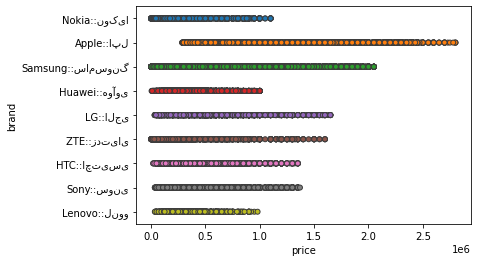

In [165]:
compare = pd.DataFrame(updated_dataset, columns = ['brand', 'price'])
answer = sb.stripplot(data=compare, y='brand', x='price', jitter=0, linewidth=1)

## Extracting Features from title
There is plenty of data in the description and title part of the input `csv` file. The problem is that this data contains both persian and english alphabets. As a result, extracting valuable data can be hard in this case. 
<br>
The results and the frequency of each word in different brands have been computed below. It is noticable that most of the data coming from persian texts are not carrying much of a value as most of its words are like موبایل , گوشی and مدل . In order to take advantage of persian data as well, some important words have been chosen and been used in features.
<br>
Overall, the data coming from titles will be separated into two parts, one persian and one english. For each of these approaches, a function has been declared before.

### `persian_to_english_digit()` function
To process the input data(title column), we are converting persian digits to english ones. To do so, we define two transforms by giving them strings indicating the ascii code of persian and arabic digits.



In [166]:
def persian_to_english_digit(input_str):

  arabic_numbers_str, persian_numbers_str, english_numbers_str = '', '', ''
  for i in range(10):
    arabic_numbers_str += chr(0x0660+i)
    persian_numbers_str += chr(0x06F0+i)
    english_numbers_str += str(i)

  arabic_trans = str.maketrans(arabic_numbers_str, english_numbers_str)
  persian_trans = str.maketrans(persian_numbers_str, english_numbers_str)

  updated_text = input_str.translate(arabic_trans)
  updated_text = updated_text.translate(persian_trans)
  return updated_text

## `get_persian_characters()` function
This function is being used in the preprocess stage of this problem. It extracts the English characters from a given string and then, subtracts it from the initial string.

In [167]:
def get_persian_characters(value):
  punc = '%&*()@#;.{}[]\/'

  regex = re.compile('[^a-zA-Z0-9]')
  unwanted = regex.sub(' ', value)
  ans = ''
  for i in range(len(value)):
    if value[i] in punc:
      continue
    if not value[i] in unwanted or value[i]==' ':
      ans += value[i]
  return ans

### `process_persian_text()` function
This function uses the `get_persian_characters()` in order to extrac the persian characters from the whole string. This function has been explained before. After using this, a `word_tokenize()` function from `hazm` library is being used. This library has been designed to process persian messages. Using this, all the characters will be converted into a list of words.
<br>
It can be noted that this library contains `stemmer` and `lemmetizer` as well. But after trying, the result was not as goof as needed so we have decided to not to use them.

In [168]:
def process_persian_text(text):
  persian_str = get_persian_characters(text)
  persian_words = word_tokenize(persian_str)

  return persian_words

### `extract_feature()` function
This unction will convert strings into english words. To do so, we first convert all the numbers in the string to an English number. It means that, we convert all the persian digits to english ones as well(in order to use their information). The `persian_to_english_digit()` function has been explained before. Then, by using `re` library, the english string will be converted into a string containing just english characters. After doing so, all the characters will be loewered and then, by uding `split` function the string will be converted into a list of words.

In [169]:
def extract_feature(text):
  text = persian_to_english_digit(text)

  regex = re.compile('[^a-zA-Z0-9]')
  english_str = regex.sub(' ', text)

  english_str = english_str.lower()
  english_words = english_str.split()

  return english_words

It should be noted that some of english words are repetitive and are just showing the brand of the phone. To make our data more of a valuable one, these names have been eliminated.

The preprocess of *title* column has been done by using the code below:<br>
First, two dictionaries will be defined in order to keep the words and their frequency(words that have been used in title). By defining functions to process each sentence and convert to a bunch of english and persian words, the words can be easily counted using two `for`. Then, these frequently used words will be sorted based on their frequency in their category(brand).

<br><br>
### What we could do to improve out method? 
#### TF-IDF
> TF-IDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect the importance of each document in a collection. It is often used as a weighting factor in searches of information retrieval, text mining, and calssification as well.
<br>
>>**TF(Term Frequency):** TF is actually calculating the frequency of a word in a document. The thought behind it is that if a word occurs multiple times in a document, its relevance should be more as it should be more meaningful than other words that appear fewer times.
<br>
$$ TF(word,documanet) = \frac{count\ of\ word\ in\ documanet}{number\ of all\ words\ in\ documanet} $$
<br>
>>**IDF(Inverse Document Frequency):** If a word occurs many times in a document and also along many other documents, it may be because of its general meaning; not because it was relevant or meaningful. In other words, IDF measures the rank of the specific word for its relevancy within the text and not its frequency. Stop words which contain unnecessary information such as “a”, “into” and “and” are a good example of less important words as they are being used generally.
<br>
$$ IDF(word) = \frac{number\ of\ all\ ducuments}{occurrence\ of\ word\ in\ documents+1} $$
>>In the furmula, the denominator is incremented in order to prevent the problem of not having a word in all the documents at all.
>><br>
**Revelance:** All in all, the total TF-IDF weight for a token in a document is:
$$ TF-IDF = TF \times IDF $$
>>
> This measurement could be used in here in order to find important words(not just picking the most frequent ones), but the calculations for this method takes time and lots of computations. So, by taking advantage of this measure, we could get better results as well.


In [170]:
ignoring_strings = ['iphone', 'galaxy', 'nokia', 'samsung', 'sony', 'iphon', 'apple', 'huawei', 'htc']

freqs = dict() 
persian_freqs = dict()
regex = re.compile('[^a-zA-Z0-9]')
print('Frequent words in titles:')

for index1, brand in enumerate(updated_dataset['brand'].unique()):
  grouped_data = dataset.groupby(['brand'])
  freqs[brand] = dict()
  persian_freqs[brand] = dict()

  for index2, value in enumerate(grouped_data.get_group(brand)['title'].unique()):
    value = persian_to_english_digit(value)
    
    persian_words = process_persian_text(value)
    english_words = extract_feature(value)

    for i in range(len(persian_words)):
      if persian_words[i] in persian_freqs[brand].keys():
        persian_freqs[brand][persian_words[i]] += 1
      else:
        persian_freqs[brand][persian_words[i]] = 1

    for i in range(len(english_words)):
      if english_words[i] in ignoring_strings:
        continue
      if english_words[i] in freqs[brand].keys():
        freqs[brand][english_words[i]] += 1
      else:
        freqs[brand][english_words[i]] = 1

sorted_freqs = dict()
persian_sorted_freqs = dict()
for index, key in enumerate(freqs):
  print(key)
  freq, words = zip(*sorted(zip(freqs[key].values(), freqs[key].keys()), reverse=True))
  persian_freq, persian_word = zip(*sorted(zip(persian_freqs[key].values(), persian_freqs[key].keys()), reverse=True))

  sorted_freqs[key] = {words[i]:freq[i] for i in range(50)}
  persian_sorted_freqs[key] = {persian_word[i]:persian_freq[i] for i in range(10)}

  print(sorted_freqs[key])
  print(persian_sorted_freqs[key])
  print()


Frequent words in titles:
Nokia::نوکیا
{'8800': 96, 'lumia': 82, '1280': 64, 'n8': 52, 'x': 49, 'n73': 49, '105': 48, '101': 45, '2': 44, '225': 42, '1520': 42, '108': 42, 'x2': 40, '206': 38, '1100': 38, '5800': 37, 'n95': 36, 'c7': 33, '930': 33, '520': 33, '130': 31, '215': 28, '1200': 28, 'n70': 26, '920': 26, '222': 26, 'xl': 25, '830': 23, '6303': 23, '107': 23, 'sim': 22, 'n97': 22, '6300': 22, '1208': 22, 'num': 21, 'c2': 21, '630': 21, 'dual': 20, 'c5': 20, 'x3': 19, 'n': 18, 'c6': 18, '8': 18, '6700': 18, '1320': 18, '1020': 18, 'x6': 16, 'x1': 16, '925': 16, '210': 16}
{'نوکیا': 1674, 'گوشی': 1051, 'موبایل': 266, 'لومیا': 213, 'سالم': 128, 'اصلی': 114, 'مدل': 102, 'تمیز': 100, 'ساده': 94, 'فروش': 85}

Apple::اپل
{'6': 2575, '5s': 1990, '16': 1703, '64': 1550, '6s': 1384, '5': 1180, '32': 816, 'gold': 734, '16g': 580, '4s': 569, 'lla': 542, 'gray': 518, '4': 491, '64g': 415, '16gb': 319, '64gb': 318, 'gig': 279, 'plus': 259, 'se': 257, '32g': 242, '128': 199, 'silver': 177, '

Now, its time to add the information as a feature to our dataset. To use these words correctly, it is better to convert them into a bunch of 0 and 1s by taking advantage of **One Hot Encoder**. This encoder, will give a 0 to a row if it doesn't contain that specific word; otherwise, it will give a 1 to that row. <br>
In this part, we separate each of the brands into a different dataframe as each brand has its own important words.
<br>
Note that some persian important words have been chosen before, and now they are being added to all the brands as a feature.
<br>
The new dataframes have been shown below.

In [171]:
grouped_data = updated_dataset.groupby(['brand'])
groups_containing_feature = dict()
persian_freq_words = ['اکبند','نو','سالم', 'آک', 'اک']

for index1, brand in enumerate(updated_dataset['brand'].unique()):
  selected_group = grouped_data.get_group(brand)
  
  for index2, key in enumerate(sorted_freqs[brand]):
    selected_group.insert(len(updated_dataset.columns), key, [0 for i in range(len(selected_group))])
  
  for x in range(len(persian_freq_words)):
    selected_group.insert(len(updated_dataset.columns), persian_freq_words[x], [0 for i in range(len(selected_group))])
    
  for index3, row in selected_group.iterrows():
    
    words = extract_feature(row['title']) 
    for i in range(len(words)):
      if words[i] in sorted_freqs[brand].keys():
        selected_group.at[index3, words[i]] = 1

    persian_words = process_persian_text(row['title'])
    for i in range(len(persian_words)):
      if persian_words[i] in persian_freq_words:
        selected_group.at[index3, persian_words[i]] = 1

  
  selected_group = selected_group.drop(['title'], axis=1)
  
  groups_containing_feature[brand] = selected_group
  display(selected_group)

,Unnamed: 0,brand,price,اک,آک,سالم,نو,اکبند,210,925,x1,x6,1020,1320,6700,8,c6,n,x3,c5,dual,630,c2,num,1208,6300,n97,sim,107,6303,830,xl,222,920,n70,1200,215,130,520,930,c7,n95,5800,1100,206,x2,108,1520,225,2,101,105,n73,x,n8,1280,lumia,8800
0,0,Nokia::نوکیا,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,Nokia::نوکیا,800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,6,Nokia::نوکیا,40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,21,Nokia::نوکیا,850000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
34,35,Nokia::نوکیا,50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59120,62103,Nokia::نوکیا,35000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
59130,62114,Nokia::نوکیا,170000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59134,62118,Nokia::نوکیا,200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59155,62141,Nokia::نوکیا,45000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Unnamed: 0,brand,price,اک,آک,سالم,نو,اکبند,appel,128gb,iphone6s,a,iphone5,s6,numg,space,iphone5s,s5,phone,128g,7,i,rose,black,6plus,grey,32gig,num,iphone6,s,g,32gb,5c,gb,64gig,16gig,silver,128,32g,se,plus,gig,64gb,16gb,64g,4,gray,lla,4s,16g,gold,32,5,6s,64,16,5s,6
1,1,Apple::اپل,1150000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,3,Apple::اپل,1100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,8,Apple::اپل,1700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
10,10,Apple::اپل,850000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,12,Apple::اپل,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59168,62154,Apple::اپل,430000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59175,62161,Apple::اپل,2050000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59179,62165,Apple::اپل,1950000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
59184,62171,Apple::اپل,500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


,Unnamed: 0,brand,price,اک,آک,سالم,نو,اکبند,n900,e5,16,grand,duos,prime,c,e7,numg,64,n9005,s2,plus,32g,3g,1,ace,mini,neo,gt,j2,s,j,a8,gold,j1,2015,a3,a7,a,32,note,num,a5,edge,s4,s7,j5,s5,6,s3,7,j7,4g,2,s6,2016,3,4,5
2,2,Samsung::سامسونگ,590000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Samsung::سامسونگ,900000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,7,Samsung::سامسونگ,310000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,13,Samsung::سامسونگ,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17,17,Samsung::سامسونگ,650000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59173,62159,Samsung::سامسونگ,700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59177,62163,Samsung::سامسونگ,240000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59180,62166,Samsung::سامسونگ,95000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59182,62168,Samsung::سامسونگ,495000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,Unnamed: 0,brand,price,اک,آک,سالم,نو,اکبند,u20,y320,g7,700,y3,5,g8,y,3,630,5x,y560,mate,600,p9,g525,y625,750,g,g510,y511,y5,y520,u10,4g,y530,4,p6,4x,y330,730,y6,g700,y300,y600,610,g750,g6,g630,p7,lite,g730,7,8,4c,6,3c,honor,p8,g610
9,9,Huawei::هوآوی,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,14,Huawei::هوآوی,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,15,Huawei::هوآوی,310000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,22,Huawei::هوآوی,800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
30,30,Huawei::هوآوی,490000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59149,62134,Huawei::هوآوی,480000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59153,62138,Huawei::هوآوی,650000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59159,62145,Huawei::هوآوی,140000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59163,62149,Huawei::هوآوی,170000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Unnamed: 0,brand,price,اک,آک,سالم,نو,اکبند,l,lfino,magna,t375,40,6,num,pro,gig,l9,v20,flex,h860,k8,kp500,l5,mini,screen,16,70,l40,lte,sim,k4,optimus,32gb,dual,x,beat,l70,32g,5x,32gig,10,stylus,g,nexus,4g,5,g5,v10,k10,g2,32,4,3,2,g4,g3,lg
11,11,LG::ال‌جی,600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
65,68,LG::ال‌جی,350000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67,70,LG::ال‌جی,150000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70,73,LG::ال‌جی,700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
86,91,LG::ال‌جی,700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59096,62075,LG::ال‌جی,300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59099,62078,LG::ال‌جی,450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59103,62085,LG::ال‌جی,180000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59181,62167,LG::ال‌جی,180000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,Unnamed: 0,brand,price,اک,آک,سالم,نو,اکبند,128,b8,go,onetouch,plus,x,32,8,leagoo,one,s40,zenfone2,5s,b25,ccit,hd,meizu,padfone,sky,vertu,4g,max,mi5,s50,7,fly,m3,mi4,s,g6,m2,pro,txl,alcatel,dimo,64,1,note,6,redmi,mi,xiaomi,5,cat,3,zenfone,4,asus,glx,2
16,16,ZTE::زدتی‌ای,1100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
98,104,ZTE::زدتی‌ای,520000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142,152,ZTE::زدتی‌ای,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
145,156,ZTE::زدتی‌ای,110000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
181,194,ZTE::زدتی‌ای,120000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59067,62045,ZTE::زدتی‌ای,700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
59095,62074,ZTE::زدتی‌ای,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59136,62120,ZTE::زدتی‌ای,65000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59147,62132,ZTE::زدتی‌ای,30000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Unnamed: 0,brand,price,اک,آک,سالم,نو,اکبند,c,mini,v,816g,32g,516,700,xe,820g,disire,hd,cha,sensation,10,2,310,4,xl,300,728,820s,8,g,chacha,500,a9,gold,max,e8,wildfire,32,9,eye,616,826,626,x,m7,s,plus,4g,820,m9,e9,sim,dual,m8,816,desire,one
41,43,HTC::اچ‌تی‌سی,450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62,65,HTC::اچ‌تی‌سی,180000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,100,HTC::اچ‌تی‌سی,680000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
123,132,HTC::اچ‌تی‌سی,550000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
137,147,HTC::اچ‌تی‌سی,850000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59126,62109,HTC::اچ‌تی‌سی,490000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59131,62115,HTC::اچ‌تی‌سی,750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
59152,62137,HTC::اچ‌تی‌سی,480000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
59170,62156,HTC::اچ‌تی‌سی,680000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


,Unnamed: 0,brand,price,اک,آک,سالم,نو,اکبند,neo,acro,miro,t3,e,experia,xz,e1,compact,u,x,sl,lte,m5,p,aqua,sim,premium,t,tx,s,5,1,c5,4,j,z4,zr,c3,c4,m2,m4,3,xa,m,c,2,v,l,t2,ultra,sp,dual,z5,z2,4g,z3,z,z1,xperia
48,51,Sony::سونی,500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
54,57,Sony::سونی,170000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80,84,Sony::سونی,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89,94,Sony::سونی,800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
96,102,Sony::سونی,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59129,62112,Sony::سونی,350000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
59138,62122,Sony::سونی,300000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
59171,62157,Sony::سونی,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59176,62162,Sony::سونی,450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Unnamed: 0,brand,price,اک,آک,سالم,نو,اکبند,y220,330,3cu10,gold,u10,y,y3,g8,y221,4x,520,y330,700,g525,gr3,p8lite,y560,4g,750,p9,y530,3,4,630,g510,g6,g630,y511,610,p6,y300,y5,g730,y520,8,g700,g750,p7,y6,7,730,5x,lite,y600,4c,p8,6,g610,3c,honor
49,52,Lenovo::لنوو,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64,67,Lenovo::لنوو,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
214,230,Lenovo::لنوو,260000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
404,426,Lenovo::لنوو,600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
620,652,Lenovo::لنوو,280000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58929,61903,Lenovo::لنوو,495000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
58946,61920,Lenovo::لنوو,730000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
59008,61985,Lenovo::لنوو,450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59101,62083,Lenovo::لنوو,730000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## The regression problem 
After preprocessing the input data, these data will be given to a classifier. There are several ways to solve this problem, from which we will mention a few of them.
### Measurements
To evaluate the models, we have to find their accuracy. However, this is not a classification task and accuracy has not been declared for such problem. To see the differences, we have used `MSE` , `MAE`, and `score` measures. These measurements show how accurate the results are.
> **1. MSE(L2 loss)** <br>
This loss sums all the square differences of the predicted value and the actual value.
<br>
 $$MSE \ loss = \frac{1}{N} \sum_{i=1}^{N}(Y_{actual_i}-Y_{predicted_i})^2 $$
> **2. MAE(L1 loss)** <br>
This approach is close to MSE, but using this loss, we sum all the differences and not their square.
$$MSE \ loss = \frac{1}{N} \sum_{i=1}^{N}abs(Y_{actual_i}-Y_{predicted_i}) $$
<br>
> **3. score** <br><br> 
This measurement seems to make more sense than the others. It gives a value between 0 and 1, in which 0 indicates returning the mean of all prices for a problem, and 1 means predicting the exact same value to the actual value.
<br>
$$score = 1 - \frac{\sum_{i=1}^{N}(Y_{actual_i}-Y_{predicted_i})^2}{\sum_{i=1}^{N}(Y_{actual_i}-Y_{mean \ all \ actuals})^2} $$ 
> <br><br>
>
<br>


### `evaluate()` function
In order to evaluate the preprocessed data, we are about to test some models. To do so, this function has been declared. In this function, by folding the data into K parts, we are going to give (K-1) part of it as train data and a part of it for the test  data. This action should be done for each of these brands separately.
<br>
The measurements which are being calculated in here has been explained before.

In [172]:
def evaluate(grouped_data, sorted_freqs, method=LinearRegression, K=5):
  
  MSE_train = dict()
  MSE_test = dict()
  MAE_train = dict()
  MAE_test = dict()
  scores_train = dict()
  scores_test = dict()

  for index, key in enumerate(sorted_freqs):
    scores_train[key] = 0
    scores_test[key] = 0
    MSE_train[key] = 0
    MSE_test[key] = 0
    MAE_train[key] = 0
    MAE_test[key] = 0

    X = grouped_data[key][sorted_freqs[key].keys()].to_numpy()
    y = grouped_data[key]["price"].to_numpy()

    kf = KFold(n_splits=K)
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      reg = method().fit(X_train, y_train)
      y_pred = reg.predict(X_test)
      y_pred_train = reg.predict(X_train)
      
      MSE_test[key] += mean_squared_error(y_test, y_pred)
      MSE_train[key] += mean_squared_error(y_train, y_pred_train)
      
      MAE_test[key] +=  mean_absolute_error(y_test, y_pred)
      MAE_train[key] +=  mean_absolute_error(y_train, y_pred_train)
      
      scores_test[key] += reg.score(X_test, y_test)
      scores_train[key] += reg.score(X_train, y_train)

    scores_test[key] /= K
    scores_train[key] /= K
    MSE_train[key] /= K
    MSE_test[key] /= K
    MAE_train[key] /= K
    MAE_test[key] /= K

  results = pd.DataFrame([scores_train, scores_test, MAE_train, MAE_test, MSE_train, MSE_test], index=['score_train', 'score_test', 'MAE_train', 'MAE_test', 'MSE_train', 'MSE_test'])
  return results



### Linear Regression
This method will give an output(called y) which is dependent to a set a indepenent inputs(called x)
<br>
$$ y = \beta_1 x_1 + \beta_2 x_2 + ... + \beta_r x_r+\epsilon$$
<br>
Where $x_1$ to $x_r$ indicates $r$ inpurs and $\epsilon$ indicates a random error.
<br>
This approach will be implemented using `sklearn` library.

In [173]:
result = evaluate(groups_containing_feature, sorted_freqs)
display(result)

,Nokia::نوکیا,Apple::اپل,Samsung::سامسونگ,Huawei::هوآوی,LG::ال‌جی,ZTE::زدتی‌ای,HTC::اچ‌تی‌سی,Sony::سونی,Lenovo::لنوو
score_train,6.255227e-01,7.342368e-01,5.021435e-01,5.282352e-01,5.504709e-01,3.741834e-01,5.228574e-01,5.694754e-01,5.589056e-01
score_test,6.087576e-01,7.314011e-01,4.989642e-01,5.194113e-01,5.203080e-01,3.164230e-01,5.074078e-01,5.522443e-01,5.199249e-01
MAE_train,6.780192e+04,1.890781e+05,2.269056e+05,7.984684e+04,1.638983e+05,1.980056e+05,1.323427e+05,1.120791e+05,7.696984e+04
MAE_test,6.908126e+04,1.901468e+05,2.275515e+05,8.067801e+04,1.684617e+05,2.072973e+05,1.347776e+05,1.140023e+05,8.089026e+04
MSE_train,1.295878e+10,8.425917e+10,1.043583e+11,1.415757e+10,5.308851e+10,7.284407e+10,3.447373e+10,2.811232e+10,1.306906e+10
MSE_test,1.343674e+10,8.519719e+10,1.049184e+11,1.438967e+10,5.606153e+10,7.939703e+10,3.559205e+10,2.919372e+10,1.422187e+10


### Random Forest Regression

A random forest is an estimator that fits a number of classifying decision trees on various subsamples of the dataset and uses averaging to improve the predictive accuracy and control overfitting. In this part, we are trying to use this model for a regression task and predict the price of phones.


In [174]:
result = evaluate(groups_containing_feature, sorted_freqs, method=RandomForestRegressor)
display(result)

,Nokia::نوکیا,Apple::اپل,Samsung::سامسونگ,Huawei::هوآوی,LG::ال‌جی,ZTE::زدتی‌ای,HTC::اچ‌تی‌سی,Sony::سونی,Lenovo::لنوو
score_train,6.456562e-01,7.677160e-01,5.633105e-01,5.513220e-01,6.064826e-01,4.557241e-01,5.715621e-01,6.152219e-01,5.755266e-01
score_test,6.204939e-01,7.423025e-01,5.441978e-01,5.327580e-01,5.436449e-01,3.395436e-01,5.259827e-01,5.614448e-01,5.157841e-01
MAE_train,6.487625e+04,1.710749e+05,1.990048e+05,7.716870e+04,1.430705e+05,1.771472e+05,1.214594e+05,1.039241e+05,7.470710e+04
MAE_test,6.699136e+04,1.842771e+05,2.050096e+05,7.918641e+04,1.568802e+05,1.968788e+05,1.308607e+05,1.110608e+05,8.084969e+04
MSE_train,1.226236e+10,7.364561e+10,9.153735e+10,1.346452e+10,4.646563e+10,6.335433e+10,3.095428e+10,2.512546e+10,1.257750e+10
MSE_test,1.305482e+10,8.176342e+10,9.544516e+10,1.398470e+10,5.320631e+10,7.689803e+10,3.422708e+10,2.860239e+10,1.437213e+10


By observing the results, it can be seen that both of the methods are working fine for this problem, but the `RandomForest` seems to be a little more accurate.

## Final predicted labels
Finally, by choosing the right model, we will train one and then, predict prices with it.

In [185]:
predicted_labels = dict()
models = dict()

for index, key in enumerate(sorted_freqs):
  print(key)
  print()
  X = groups_containing_feature[key][sorted_freqs[key].keys()].to_numpy()
  y = groups_containing_feature[key]["price"].to_numpy()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  reg = RandomForestRegressor().fit(X_train, y_train)
  models[key] = reg
  
  y_pred = reg.predict(X_test)

  answer = pd.DataFrame(y_test, columns=['actual'])
  answer.insert(1, 'predicted', y_pred )
  predicted_labels[key] = answer
  display(answer)
  print()


Nokia::نوکیا



,actual,predicted
0,90000,126652.154954
1,250000,126652.154954
2,15000,126652.154954
3,100000,126652.154954
4,35000,58503.327609
...,...,...
678,100000,80468.237292
679,99000,126652.154954
680,70000,78062.815831
681,50000,126652.154954



Apple::اپل



,actual,predicted
0,1680000,1.499073e+06
1,1200000,9.171311e+05
2,1850000,1.493181e+06
3,1050000,8.871015e+05
4,2300000,2.006965e+06
...,...,...
2637,2700000,1.038009e+06
2638,850000,1.038009e+06
2639,600000,1.038009e+06
2640,1800000,1.776723e+06



Samsung::سامسونگ



,actual,predicted
0,800000,6.393505e+05
1,400000,3.687007e+05
2,215000,3.618357e+05
3,400000,3.637182e+05
4,850000,3.910954e+05
...,...,...
3590,1850000,1.356603e+06
3591,650000,7.518539e+05
3592,1950000,1.204969e+06
3593,35000,3.910954e+05



Huawei::هوآوی



,actual,predicted
0,250000,411454.298306
1,210000,201554.562110
2,220000,304724.458406
3,870000,588187.511147
4,210000,234171.714074
...,...,...
1296,180000,185828.801415
1297,200000,185470.454834
1298,500000,604924.710489
1299,300000,365155.884790



LG::ال‌جی



,actual,predicted
0,680000,674876.551227
1,180000,325450.226765
2,230000,325450.226765
3,460000,573183.333333
4,905000,729878.479721
...,...,...
443,1580000,859684.388947
444,180000,325450.226765
445,120000,325450.226765
446,500000,495425.174968



ZTE::زدتی‌ای



,actual,predicted
0,75000,258711.747412
1,120000,258711.747412
2,90000,258711.747412
3,10000,258711.747412
4,120000,258711.747412
...,...,...
297,120000,258711.747412
298,250000,258711.747412
299,650000,258711.747412
300,660000,258711.747412



HTC::اچ‌تی‌سی



,actual,predicted
0,350000,439366.193700
1,170000,122362.404402
2,400000,387143.880375
3,400000,343619.267420
4,499000,708023.385831
...,...,...
515,750000,343619.267420
516,400000,445833.003211
517,850000,744209.509728
518,190000,285487.721170



Sony::سونی



,actual,predicted
0,500000,507727.303283
1,100000,322425.397668
2,500000,543420.912421
3,650000,642617.485292
4,630000,625075.115824
...,...,...
743,550000,625075.115824
744,900000,747167.038296
745,440000,470538.941013
746,500000,322425.397668



Lenovo::لنوو



,actual,predicted
0,430000,321537.602993
1,370000,359249.153053
2,160000,131867.996032
3,230000,321537.602993
4,150000,168760.694037
...,...,...
193,610000,603588.393078
194,190000,168760.694037
195,100000,321537.602993
196,350000,338205.367424
